## Operations with normal distribution
Lets work with page https://bookdown.org/aquintela/EBE/ejemplos-de-la-distribucion-normal.html

 Adolphe Quetelet. Fue el primero en advertir que los datos antropométricos de los individuos de una misma población, raza, sexo y edad, constituyen una variable normal.

Para verlo con un ejemplo, elegimos el fichero de datos “body_dat.csv”, cogido de http://ww2.amstat.org/publications/jse/v11n2/datasets.heinz.html

El fichero consta de la medición de 25 Variables en 507 individuos (247 hombres y 260 mujeres, principalmente de entre 20 y 30 años de edad, todos haciendo ejercicio varias horas a la semana). Las mediciones fueron tomadas inicialmente for Grete Heinz y Louis J. Peterson en la Universidad Estatal de San José (USA) y en la Escuela de Postgrado Nval de Monterrey, California. Más tarde, se tomaron mediciones en centros de salud y acondicionamiento físico de California. La siguiente es la descripción del fichero por columnas:



````python
#   Columnas    Variable  
#   
#   Medidas esqueléticas:  
#      
#  1 - 4    Diámetro biacromial  
#  6 - 9    Diámetro biológico, o "anchura pélvica"  
#  11 - 14  Diámetro bitrocantéreo  
#  16 - 19  Profundidad del pecho entre la 
#           columna vertebral 
#           y esternón a la altura de los pezones  
#  21 - 24  Diámetro del pecho a nivel del pezón   
#  26 - 29  Diámetro del codo, 
#           suma de dos codos  
#  31 - 34  Diámetro de muñeca, 
#           suma de dos muñecas  
#  36 - 39  Diámetro de rodilla, 
#           suma de dos rodillas  
#  41 - 44  Diámetro del tobillo, 
#            suma de dos tobillos  
#    
#  Medidas de circunferencia:  
#      
#  46 - 50  Circunferencia del hombro 
#           sobre los músculos deltoides  
#  52 - 56  Perímetro torácico, línea de los 
#           pezones en los hombres y 
#           justo por encima del pecho   
#  58 - 62  Cincha de la cintura, parte 
#           más estrecha del torso por 
#           debajo de la caja torácica    
#  64 - 68  Circunferencia del ombligo 
#           (o "abdominal") 
#           en el ombligo y la 
#           cresta ilíaca    
#  70 - 74  Cincha de la cadera al nivel 
#           del diámetro bitrocantéreo  
#  76 - 79  Circunferencia del muslo 
#           por debajo del pliegue glúteo,
#           promedio de dcha. e izda.   
#  81 - 84  Cincha del bíceps, flexionada, 
#           promedio de cinchas
#           derecha e izquierda  
#  86 - 89  Cincha del antebrazo, extendida, 
#           palma hacia arriba, promedio 
#           de circunferencia derecha 
#           e izquierda
#  91 - 94  Cincha de la rodilla sobre 
#           la rótula, posición 
#           ligeramente flexionada, promedio   
#  96 - 99  circunferencia máxima de la
#           pantorrilla, promedio de 
#           circunferencias derecha e izquierda  
#  101 -104 Circunferencia mínima del tobillo, 
#           media de cir. derecha e izda. 
#  106 -109 circunferencia mínima de muñeca, 
#           promedio de cir. derecha e izda. 
#    
#  Otras medidas:  
#      
#  111-114        Edad (años)  
#  116-120        Peso (kg)  
#  122-126        Altura (cm)  
#  128 Género    (1 - hombre, 0 - mujer)  
#    
#  Las primeras 21 variables 
#  se miden en centímetros (cm).  
#    
#  Los valores están separados por 
#  espacios en blanco. No faltan valores.  
````

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplt
import os

In [12]:

distpath = "http://jse.amstat.org/datasets/body.dat.txt"
data = pd.read_csv(distpath, delim_whitespace=True, header=None)

Vamos a jugar con estos datos un poco

In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21.0,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23.0,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28.0,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23.0,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22.0,78.8,187.2,1


In [19]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,38.811440,27.829980,31.980473,19.226036,27.973767,13.385207,10.542604,18.810651,13.863314,108.195069,...,31.169625,25.942998,36.202959,36.078304,22.157396,16.097436,30.181460,69.147535,171.143787,0.487179
std,3.059132,2.206308,2.030916,2.515877,2.741650,1.352906,0.944361,1.347595,1.247351,10.374834,...,4.246941,2.830579,2.617570,2.847661,1.862337,1.380931,9.608472,13.345762,9.407205,0.500329
min,32.400000,18.700000,24.700000,14.300000,22.200000,9.900000,8.100000,15.700000,9.900000,85.900000,...,22.400000,19.600000,29.000000,28.400000,16.400000,13.000000,18.000000,42.000000,147.200000,0.000000
25%,36.200000,26.500000,30.600000,17.300000,25.650000,12.400000,9.800000,17.900000,13.000000,99.450000,...,27.600000,23.600000,34.400000,34.100000,21.000000,15.000000,23.000000,58.400000,163.800000,0.000000
50%,38.700000,28.000000,32.000000,19.000000,27.800000,13.300000,10.500000,18.700000,13.800000,108.200000,...,31.000000,25.800000,36.000000,36.000000,22.000000,16.100000,27.000000,68.200000,170.300000,0.000000
75%,41.150000,29.250000,33.350000,20.900000,29.950000,14.400000,11.200000,19.600000,14.800000,116.550000,...,34.450000,28.400000,37.950000,38.000000,23.300000,17.100000,36.000000,78.850000,177.800000,1.000000
max,47.400000,34.700000,38.000000,27.500000,35.600000,16.700000,13.300000,24.300000,17.200000,134.800000,...,42.400000,32.500000,49.000000,47.700000,29.300000,19.600000,67.000000,116.400000,198.100000,1.000000


In [24]:
data.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

Text(0.5, 1.0, 'Histograma de la altura')

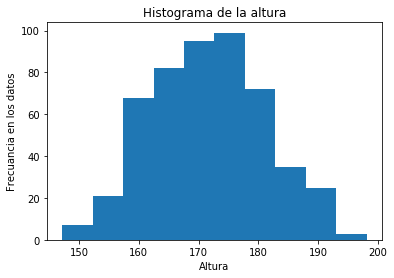

In [30]:
matplt.hist(data[23])
matplt.xlabel("Altura")
matplt.ylabel("Frecuancia en los datos")
matplt.title("Histograma de la altura")


Text(0.5, 1.0, 'Histograma del Peso')

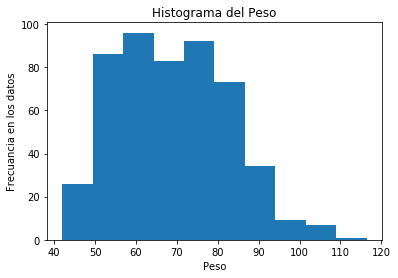

In [29]:
matplt.hist(data[22])
matplt.xlabel("Peso")
matplt.ylabel("Frecuancia en los datos")
matplt.title("Histograma del Peso")

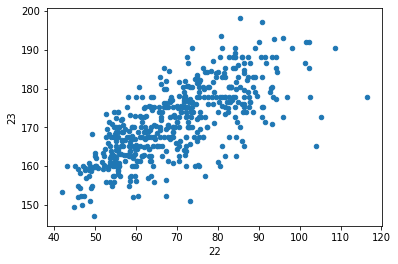

In [27]:
data.plot(kind="scatter", x=22, y =23 ) ## peso vs altura